## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

batch-normalization: accuracy rate: 0.95
dropout: accuracy rate: 0.55
regularizers: accurracy rate: 0.70

In [17]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [23]:
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.1608 - acc: 0.2801 - val_loss: 1.9908 - val_acc: 0.3491
Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9386 - acc: 0.3706 - val_loss: 1.8865 - val_acc: 0.3898
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.8527 - acc: 0.4012 - val_loss: 1.8134 - val_acc: 0.4122
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7921 - acc: 0.4213 - val_loss: 1.7718 - val_acc: 0.4244
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7448 - acc: 0.4384 - val_loss: 1.7233 - val_acc: 0.4453
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7047 - acc: 0.4533 - val_loss: 1.7059 - val_acc: 0.4443
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6723 - acc: 0.4627 - val_loss: 1.6760 - 

Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7926 - acc: 0.3703 - val_loss: 1.7510 - val_acc: 0.3796
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7129 - acc: 0.4025 - val_loss: 1.6915 - val_acc: 0.4053
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6573 - acc: 0.4191 - val_loss: 1.6289 - val_acc: 0.4260
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6120 - acc: 0.4367 - val_loss: 1.6124 - val_acc: 0.4327
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5726 - acc: 0.4477 - val_loss: 1.5652 - val_acc: 0.4446
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5414 - acc: 0.4604 - val_loss: 1.5562 - val_acc: 0.4479
Epoch 8/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5119 - acc: 0.4685 - val_loss: 1.5148 - val_acc: 0.4645
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 152us/step - loss: 1.7111 - acc: 0.4021 - val_loss: 1.6838 - val_acc: 0.4114
Epoch 4/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6528 - acc: 0.4212 - val_loss: 1.6315 - val_acc: 0.4287
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6056 - acc: 0.4387 - val_loss: 1.5936 - val_acc: 0.4445
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5678 - acc: 0.4521 - val_loss: 1.5903 - val_acc: 0.4368
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5370 - acc: 0.4618 - val_loss: 1.5471 - val_acc: 0.4529
Epoch 8/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5079 - acc: 0.4719 - val_loss: 1.5307 - val_acc: 0.4545
Epoch 9/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4829 - acc: 0.4818 - val_loss: 1.4951 - val_acc: 0.4679
Epoch 10/50
50000/50000 [====================

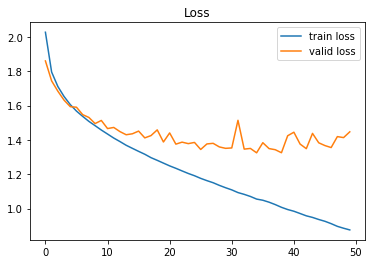

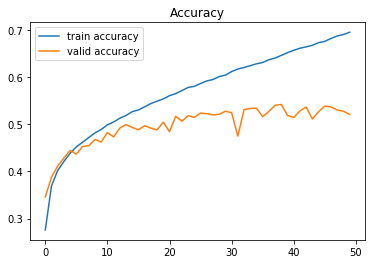

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()